In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=  pd.read_csv('heartfailure.csv')
data.head()
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [3]:
data.shape

(299, 13)

In [4]:
#check for missing data
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

C:\Users\buing\AppData\Local\Temp\ipykernel_4496\2138943538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT',data=data,palette='RdBu_r')


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

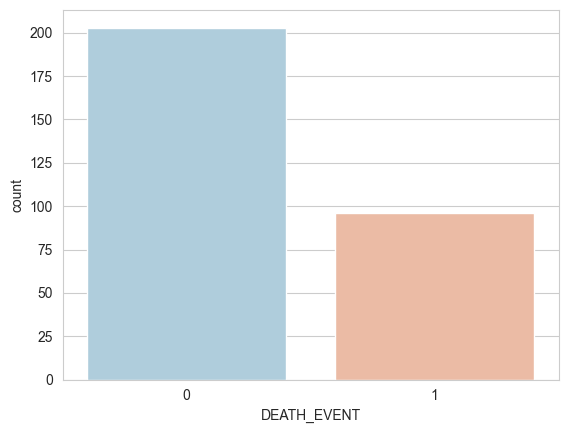

In [5]:
#Checking Data Balance( unbiased model or not)
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',data=data,palette='RdBu_r')

PERFORMING KNN BY SPLITTING DATA

In [6]:
x= data.iloc[:,0:13].values 
y= data['DEATH_EVENT'].values
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)


In [7]:
knn= KNeighborsClassifier(n_neighbors=20)  
knn.fit(x_train, y_train)

#his one does not have scaling so worse performance
accuracy_score(y_test, knn.predict(x_test) )

0.6555555555555556

Minimum error:- 0.3111111111111111 at K = 22


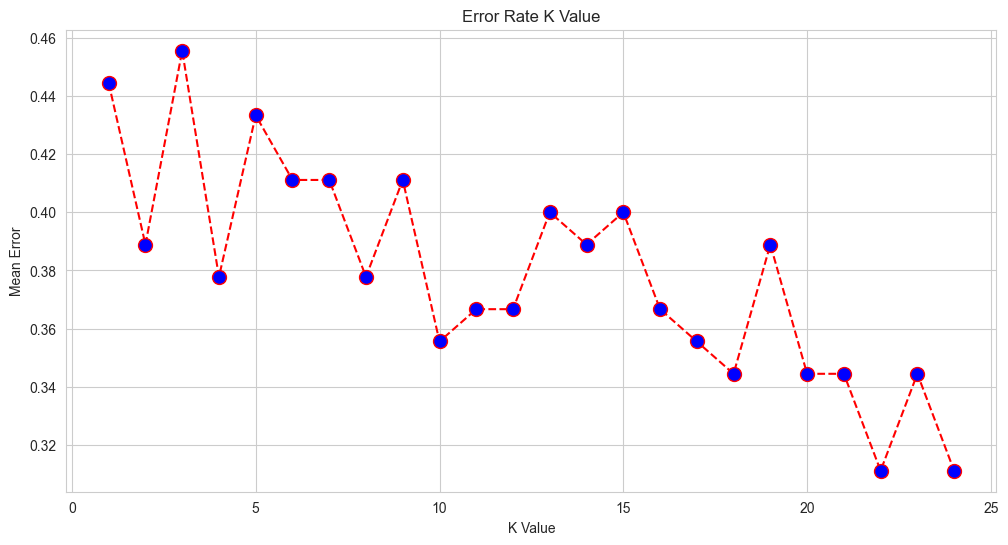

In [8]:
#Checking for the best value of  k:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Performance with input normalization

In [9]:
from sklearn.preprocessing import StandardScaler    
# Scale the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
knn.fit(X_train_scaled, y_train) #OMGGGG THIS IS SO IMPORTANT 
# Evaluate the accuracy
print ('Train dataset accuracy: ', accuracy_score(y_train , knn.predict(X_train_scaled)))
print('Test dataset accuracy: ', accuracy_score(y_test, knn.predict(X_test_scaled)))


Train dataset accuracy:  0.937799043062201
Test dataset accuracy:  0.9444444444444444


Minimum error:- 0.011111111111111112 at K = 9


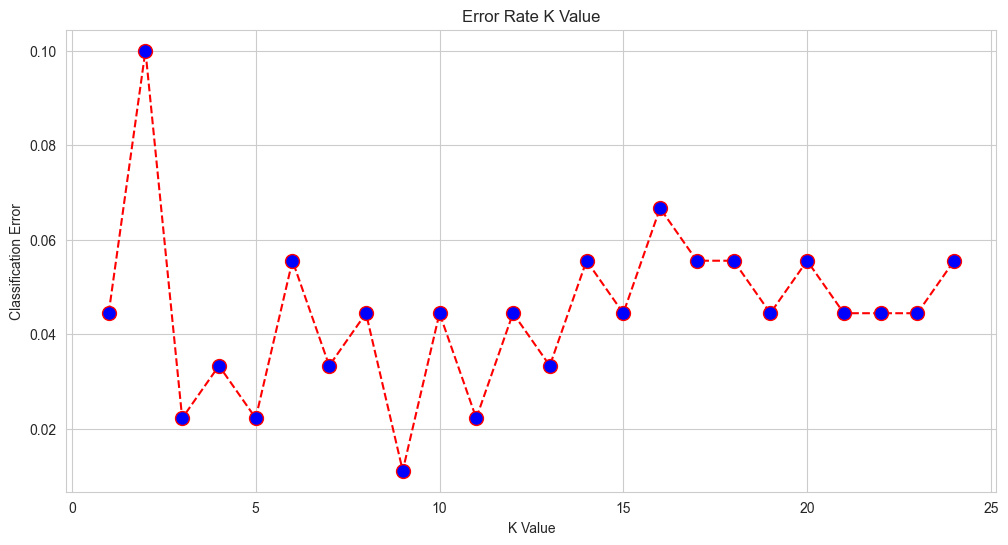

In [10]:
# ERROR PERFORMANCE AFTER NORMALIZING
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Classification Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

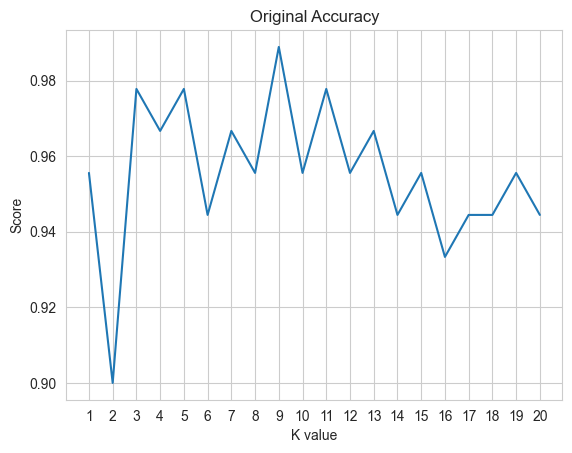

Maximum KNN Score is 98.89%
K Value with highest score:  9


In [11]:
accuracyList = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train_scaled, y_train)
    accuracyList.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.title('Original Accuracy')
plt.plot(range(1,21), accuracyList)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(accuracyList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (accuracyList.index(max(accuracyList))+1))

In [12]:
#PCA to reduce dimensions
#Use components such that 95% of variance is retained¶
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
x_pca.shape
pca.n_components_



1

In [13]:
pca.explained_variance_ratio_

array([0.99990099])

In [14]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.3, random_state=30)

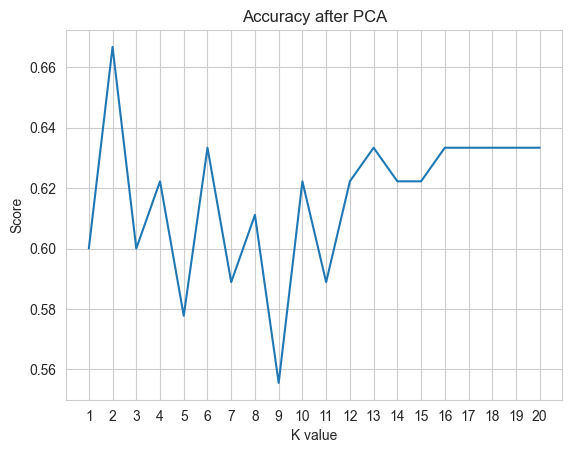

Maximum KNN Score is 66.67%
K Value with highest score:  2


In [15]:
accuracy_pca = []
# k= scaler.fit_transform(x_train_pca) #double standard scaling???
# f= scaler.transform(x_test_pca)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(x_train_pca, y_train_pca)
    accuracy_pca.append(accuracy_score(y_test_pca, knn.predict(x_test_pca)))

plt.title('Accuracy after PCA')
plt.plot(range(1,21), accuracy_pca )
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(accuracy_pca )*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (accuracy_pca .index(max(accuracy_pca ))+1))

K cross to avoid bias and gridsearch to tune data

In [16]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with scaling and k-NN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid for KNN
param_grid = {
    'knn__n_neighbors': [i for i in range(1, 50)],  # Example range of values for n_neighbors
    'knn__weights': ['uniform', 'distance'],  # Example options for weights
    'knn__metric': ['euclidean', 'manhattan']  # Example options for metric
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=10)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Extract best model
best_knn = grid_search.best_estimator_

# Evaluate the performance of the best model using cross_val_score
cv_results = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='accuracy')
print(sum(cv_results)/len(cv_results))


0.9445454545454547


In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store predictions and true labels
predictions = []
true_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Scale the features (ensure proper scaling within each fold)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit KNN classifier on scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict on scaled test data
    y_pred = knn.predict(X_test_scaled)
    
    # Collect predictions and true labels
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate error rate
error_rate = 1.0 - accuracy_score(true_labels, predictions)
print("Leave-One-Out Error Rate:", error_rate)


IndexError: index 150 is out of bounds for axis 0 with size 150

SVM

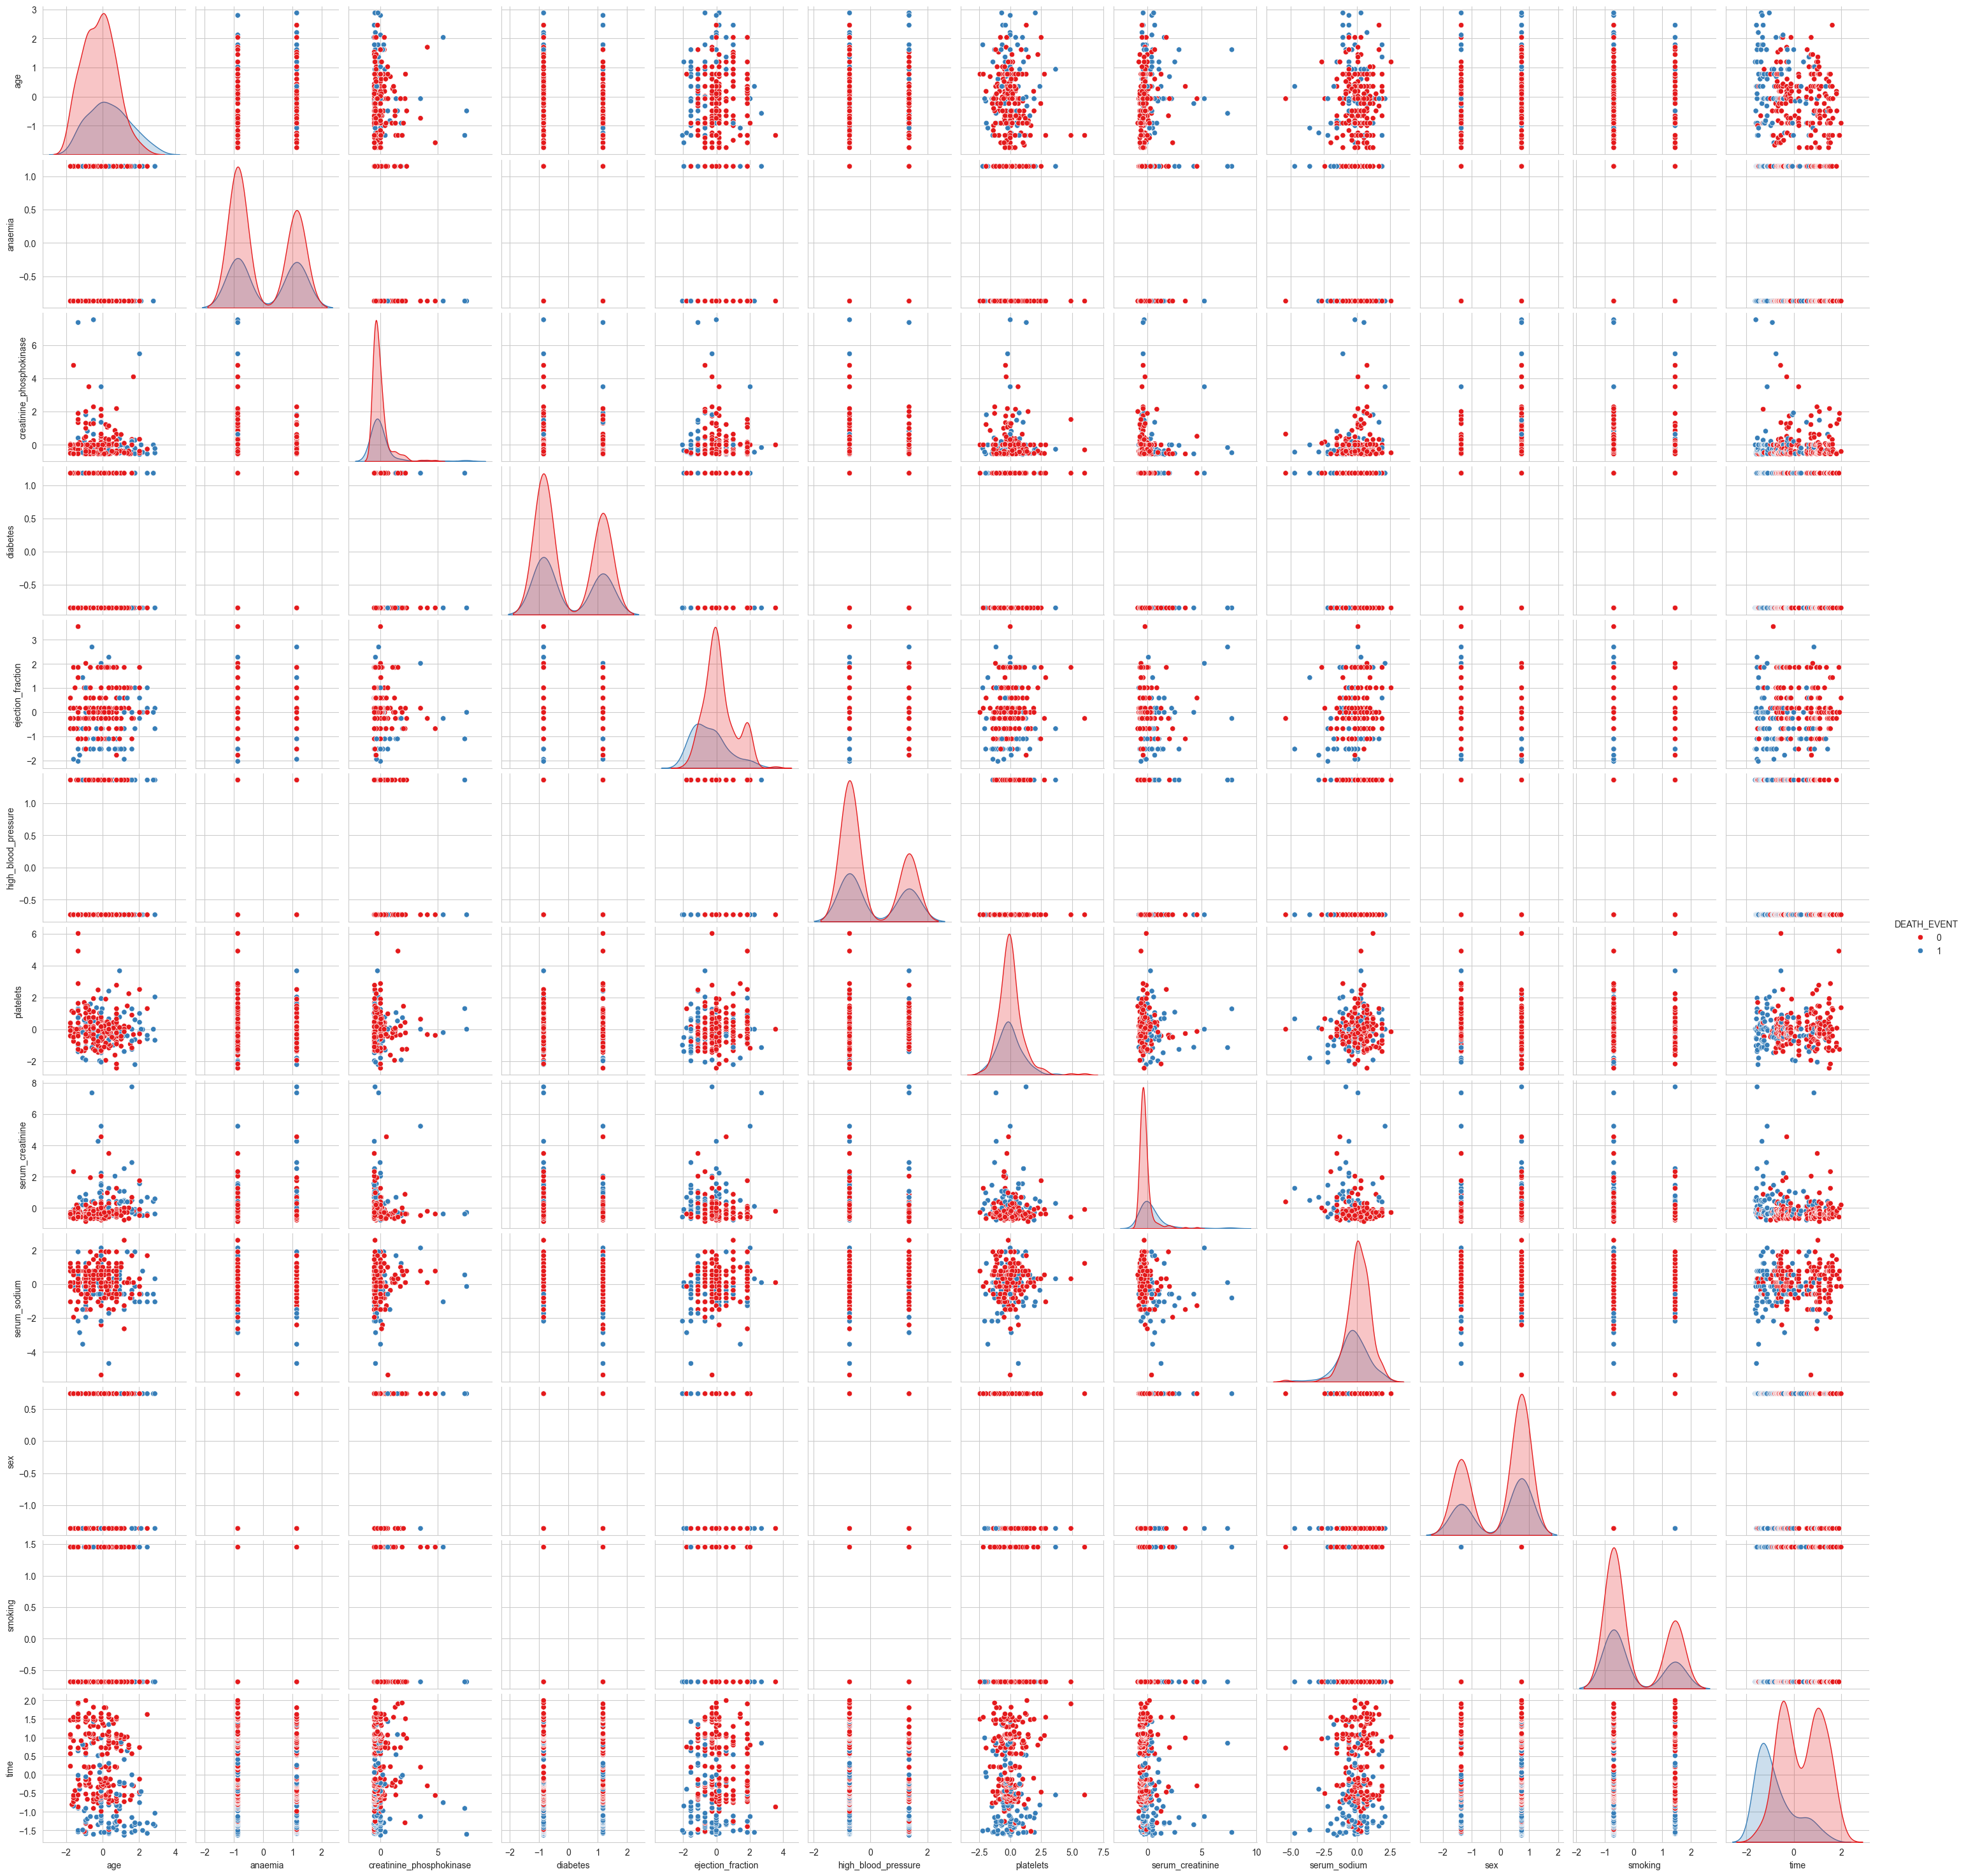

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X = data.drop(columns=['DEATH_EVENT'])
Y = data['DEATH_EVENT']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Pairplot with hue for binary target variable 'DEATH_EVENT'
sns.pairplot(data=pd.concat([X_scaled_df, y], axis=1), hue='DEATH_EVENT', palette='Set1', diag_kind='auto')
plt.show()


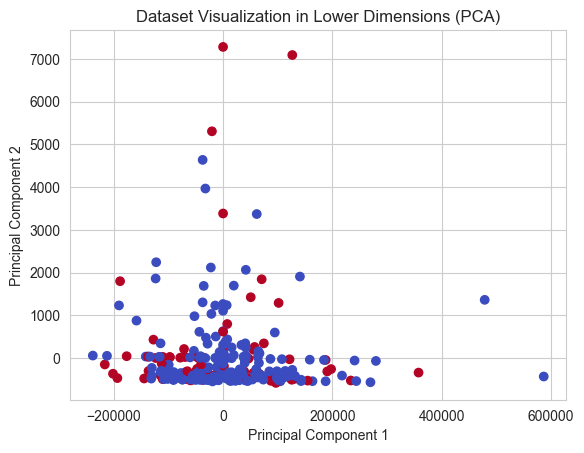

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dataset Visualization in Lower Dimensions (PCA)')
plt.show()

K cross to avoid bias and gridsearch to tune data

Linear SVMs are effective when the dataset is linearly separable

In [ ]:
# 3. Set up SVM parameters: RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accu_svm_rbf = accuracy_score(y_test, y_pred_rbf)

print(f'SVM RBF Accuracy: {accu_svm_rbf}')

SVM RBF Accuracy: 1.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the pipeline with preprocessing steps and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('classifier', LogisticRegression())  # Step 2: Classifier (Logistic Regression)
])

# Cross-validation
# Here, we use cross_val_score to perform 5-fold cross-validation
# Pipeline automatically ensures that the StandardScaler is fitted only on the training folds
# and transformations are applied independently to each fold
scores = cross_val_score(pipeline, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", scores)
print("Average Accuracy:", scores.mean())




Cross-validation Scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Average Accuracy: 0.9600000000000002


Explanation:
We create a Pipeline consisting of two steps: feature scaling using StandardScaler and classification using LogisticRegression.
During cross-validation, cross_val_score splits the data into 5 folds (specified by cv=5) and ensures that the preprocessing steps (scaling) are fitted only on the training folds.
Each fold is used as a validation set while the rest are used for training. The pipeline ensures that transformations are applied independently to each fold, preventing data leakage.